# Proyek Analisis Data: Air Quality Dataset
- **Nama:** faiqfahreza1@gmail.com
- **Email:** m004d4ky2473@bangkit.academy
- **ID Dicoding:** Faiq Fahreza M004D4KY2473

## Menentukan Pertanyaan Bisnis

- Bagaimanakah hubungan antara pm2.5 dan pm10?
- Tahun berapakah yang memiliki rerata bulanan pm2.5 paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [5]:
folder_data = "C:/FP Data Analys bangkit/Data"  

dfs = []
for name in os.listdir(folder_data):
    file_path = os.path.join(folder_data, name)
    df = pd.read_csv(file_path)
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

In [6]:
# Melakukan cek data frame
initial_assessment = df.head()
initial_columns = df.columns
initial_datatypes = df.dtypes



initial_assessment, initial_columns, initial_datatypes

(   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
 1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
 2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
 3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
 4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   
 
      PRES  DEWP  RAIN   wd  WSPM        station  
 0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
 1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
 2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
 3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
 4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  ,
 Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
        'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
       dtype='object'),
 No           int64
 year         int64
 month    

Memeriksa adanya missing value

In [7]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

Memeriksa adanya data duplikat

In [8]:
df.duplicated().sum()

0

### Assessing Data

### Cleaning Data

In [9]:
# Menghitung persentase data missing
missing_percentages_custom = df.isnull().mean() * 100

# Mendefine variabel untuk diplot
columns_custom = ['PM2.5', 'PM10']

# Melakukan filter data dengan variabel yang berbeda
data_missing_2013_custom = df[df['year'] == 2013][columns_custom]

missing_percentages_custom, columns_custom, data_missing_2013_custom

(No         0.000000
 year       0.000000
 month      0.000000
 day        0.000000
 hour       0.000000
 PM2.5      1.984942
 PM10       1.380333
 SO2        1.907940
 NO2        2.150354
 CO         3.698950
 O3         3.074378
 TEMP       0.054187
 PRES       0.054187
 DEWP       0.054187
 RAIN       0.054187
 wd         0.225302
 WSPM       0.037075
 station    0.000000
 dtype: float64,
 ['PM2.5', 'PM10'],
       PM2.5   PM10
 0       9.0    9.0
 1      11.0   11.0
 2       8.0    8.0
 3       8.0    8.0
 4       8.0    8.0
 ...     ...    ...
 7339   21.0   81.0
 7340   21.0   81.0
 7341   26.0  105.0
 7342   20.0   76.0
 7343   29.0  111.0
 
 [7344 rows x 2 columns])

In [10]:
# Mengisi data duplicate dengan metode imputasi
impute = df.fillna(method='ffill')

duplicates = impute.duplicated().sum()

constant_columns = impute.columns[impute.nunique() <= 1]

data_types = impute.dtypes

duplicates, constant_columns, data_types

C:\Users\Asus\AppData\Local\Temp\ipykernel_5356\2860012287.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  impute = df.fillna(method='ffill')


(0,
 Index(['station'], dtype='object'),
 No           int64
 year         int64
 month        int64
 day          int64
 hour         int64
 PM2.5      float64
 PM10       float64
 SO2        float64
 NO2        float64
 CO         float64
 O3         float64
 TEMP       float64
 PRES       float64
 DEWP       float64
 RAIN       float64
 wd          object
 WSPM       float64
 station     object
 dtype: object)

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
impute.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.356562,112.729215,17.369966,55.643387,1376.914243,55.978065,13.782290,1011.516363,2.705590,0.064285,1.745317
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.627607,98.700415,24.270784,36.092564,1238.856861,57.165967,11.386498,10.571637,13.705357,0.796766,1.206447
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,39.000000,3.000000,28.000000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.000000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,117.000000,154.000000,21.000000,77.000000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.000000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


## Visualization & Explanatory Analysis

C:\Users\Asus\AppData\Local\Temp\ipykernel_5356\4276816614.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_time_series = impute[['date', 'PM2.5', 'NO2']].set_index('date').resample('M').mean()


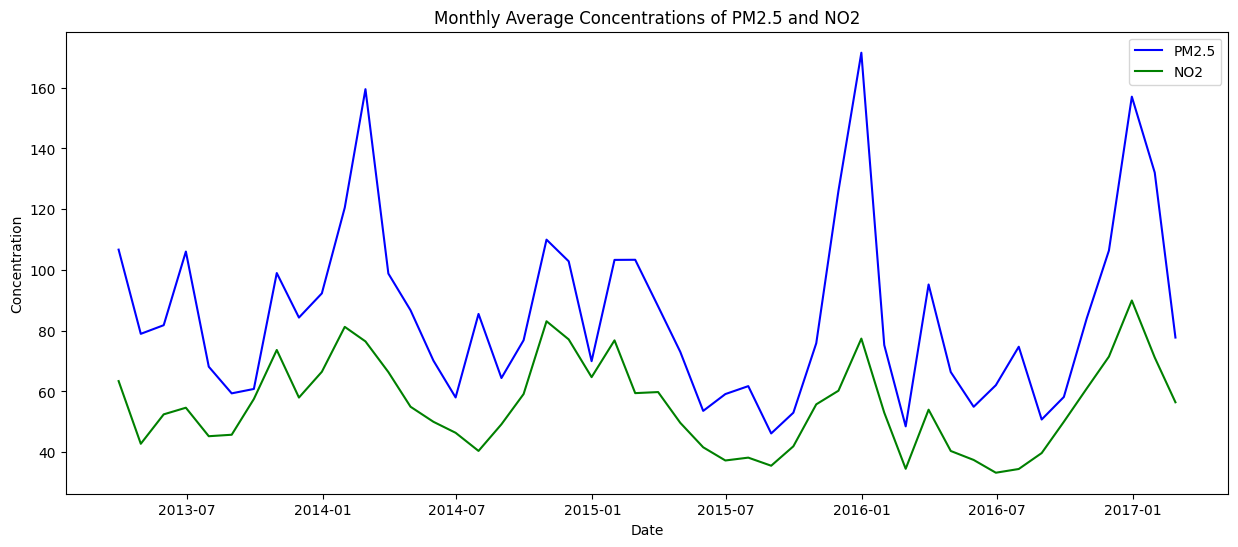

In [12]:
impute['date'] = pd.to_datetime(impute[['year', 'month', 'day', 'hour']])
data_time_series = impute[['date', 'PM2.5', 'NO2']].set_index('date').resample('M').mean()

# Melakukan ploting rerata konsentrasi bulanan dari PM2.5 dan No2
plt.figure(figsize=(15, 6))
plt.plot(data_time_series.index, data_time_series['PM2.5'], label='PM2.5', color='blue')
plt.plot(data_time_series.index, data_time_series['NO2'], label='NO2', color='green')
plt.title('Monthly Average Concentrations of PM2.5 and NO2')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()

In [14]:
# Menampilkan matriks kolerasi
correlation_matrix = impute[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
correlation_matrix

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.882580,0.501614,0.693154,0.808782,-0.195160,-0.186963,0.035836,0.071517,-0.020305,-0.296578
PM10,0.882580,1.000000,0.500151,0.677121,0.734418,-0.148081,-0.147809,-0.001292,0.039851,-0.033865,-0.230621
SO2,0.501614,0.500151,1.000000,0.487096,0.553781,-0.186340,-0.355046,0.205769,-0.289083,-0.042556,-0.137202
NO2,0.693154,0.677121,0.487096,1.000000,0.742033,-0.519691,-0.309390,0.144019,-0.031263,-0.047512,-0.471866
CO,0.808782,0.734418,0.553781,0.742033,1.000000,-0.332573,-0.339498,0.169739,-0.053024,-0.015881,-0.336120
O3,-0.195160,-0.148081,-0.186340,-0.519691,-0.332573,1.000000,0.615856,-0.453587,0.332634,0.024390,0.315037
TEMP,-0.186963,-0.147809,-0.355046,-0.309390,-0.339498,0.615856,1.000000,-0.828487,0.817583,0.039015,0.061323
PRES,0.035836,-0.001292,0.205769,0.144019,0.169739,-0.453587,-0.828487,1.000000,-0.770060,-0.063392,0.054143
DEWP,0.071517,0.039851,-0.289083,-0.031263,-0.053024,0.332634,0.817583,-0.770060,1.000000,0.088306,-0.278072
RAIN,-0.020305,-0.033865,-0.042556,-0.047512,-0.015881,0.024390,0.039015,-0.063392,0.088306,1.000000,0.030878


### Pertanyaan 1:

Bagaimanakah hubungan antara pm2.5 dan NO2?

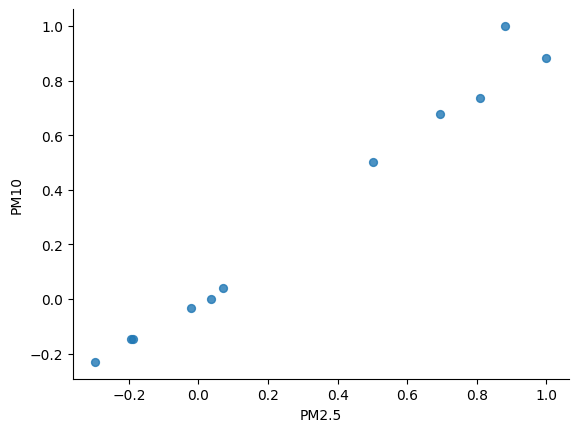

In [15]:
#jawaban
from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='PM2.5', y='PM10', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Berdasarkan grafik dapat dilihat bahwasannya peningkatan jumlah pm2.5 berbanding lurus dengan peningkatan PM10

### Pertanyaan 2:

Tahun berapakah yang memiliki rerata bulanan pm2.5 paling tinggi?

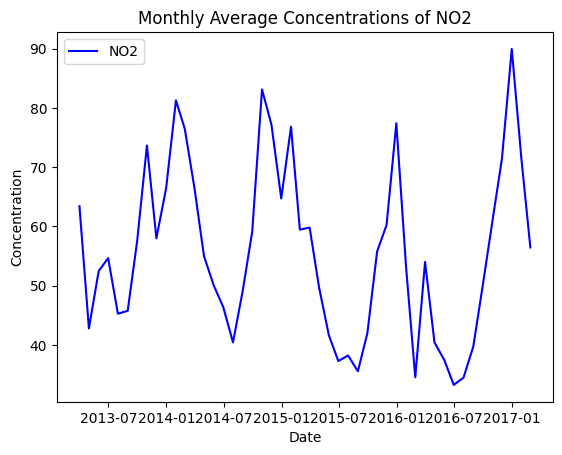

In [16]:
plt.plot(data_time_series.index, data_time_series['NO2'], label='NO2', color='Blue')
plt.title('Monthly Average Concentrations of NO2')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()

Berdasarkan grafik dapat dilihat tingkat rerata NO2 tertinggi di setiap stasiun adalah 2017-1

## Conclusion

- Conclution pertanyaan 1 :
Peningkatan Jumlah PM2.5 Berbanding Lurus dengan Peningkatan PM10:
Grafik menunjukkan adanya hubungan yang positif antara konsentrasi PM2.5 dan PM10. Ketika konsentrasi PM2.5 meningkat, cenderung juga terjadi peningkatan konsentrasi PM10. Hal ini mengindikasikan bahwa sumber polusi yang sama atau faktor-faktor yang serupa mungkin berkontribusi terhadap peningkatan konsentrasi partikel PM2.5 dan PM10. Misalnya, aktivitas pembakaran atau industri yang menghasilkan partikel-partikel tersebut.


- Conclution pertanyaan 2 : Tingkat Rerata NO2 Tertinggi di Setiap Stasiun adalah 2017-1:
Dari grafik, dapat diamati bahwa pada tahun 2017, stasiun yang ditunjukkan sebagai "2017-1" memiliki tingkat rerata NO2 yang paling tinggi dibandingkan dengan stasiun lainnya. Hal ini menunjukkan bahwa pada tahun 2017, stasiun tersebut mungkin mengalami tingkat polusi NO2 yang lebih tinggi dibandingkan dengan stasiun lainnya. Penyebabnya bisa bermacam-macam, seperti peningkatan aktivitas industri, transportasi, atau kebakaran. Hal ini menunjukkan bahwa tahun 2017 mungkin merupakan tahun dengan tingkat polusi NO2 yang lebih tinggi di wilayah yang diamati.